## MNIST - TensorFlow multilayer Perceptron 

In [1]:
import tensorflow as tf

/Users/sulbha/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
type(mnist.train.images)

numpy.ndarray

In [5]:
mnist.train.images[2].shape

(784,)

In [6]:
type( mnist.train.images[2])

numpy.ndarray

In [36]:
sample = mnist.train.images[2].reshape(28,28)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

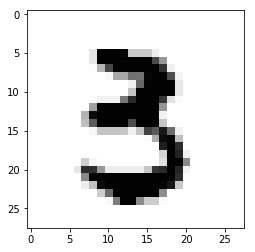

In [38]:
plt.imshow(sample, cmap='Greys')

In [39]:
### setting up parameters

In [40]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [12]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [13]:
## Tensor flow graph input

In [14]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [15]:
# train model
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [16]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [17]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [19]:
# cost and optimizing

In [20]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=pred, logits =  y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
Xsamp,ysamp = mnist.train.next_batch(1)

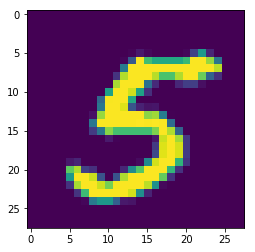

In [23]:
plt.imshow(Xsamp.reshape(28,28))

In [24]:
# Remember indexing starts at zero!
print(ysamp)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [25]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=-26491403.2468
Epoch: 2 cost=-425711325.3382
Epoch: 3 cost=-1724061566.6036
Epoch: 4 cost=-4238200991.1855
Epoch: 5 cost=-8157050549.5273
Epoch: 6 cost=-13608973775.5927
Epoch: 7 cost=-20698415614.1382
Epoch: 8 cost=-29520941845.4109
Epoch: 9 cost=-40160489550.1964
Epoch: 10 cost=-52720691847.9128
Epoch: 11 cost=-67294967204.7709
Epoch: 12 cost=-83985529316.0726
Epoch: 13 cost=-102884397666.6764
Epoch: 14 cost=-124099933277.0908
Epoch: 15 cost=-147738841370.9964
Model has completed 15 Epochs of Training


In [26]:
# Model Evaluation

In [27]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [28]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [29]:
correct_predictions = tf.cast(correct_predictions, "float")

In [30]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [31]:
accuracy = tf.reduce_mean(correct_predictions)

In [32]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [33]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.1009
